# Virtual Environments and Requests Module

In [1]:
import requests

r = requests.get('https://api.github.com/users/Connor-SM')

print( r )
print(type( r ))

<Response [200]>
<class 'requests.models.Response'>


In [2]:
data = r.content

print(data)

b'{"login":"Connor-SM","id":20958711,"node_id":"MDQ6VXNlcjIwOTU4NzEx","avatar_url":"https://avatars.githubusercontent.com/u/20958711?v=4","gravatar_id":"","url":"https://api.github.com/users/Connor-SM","html_url":"https://github.com/Connor-SM","followers_url":"https://api.github.com/users/Connor-SM/followers","following_url":"https://api.github.com/users/Connor-SM/following{/other_user}","gists_url":"https://api.github.com/users/Connor-SM/gists{/gist_id}","starred_url":"https://api.github.com/users/Connor-SM/starred{/owner}{/repo}","subscriptions_url":"https://api.github.com/users/Connor-SM/subscriptions","organizations_url":"https://api.github.com/users/Connor-SM/orgs","repos_url":"https://api.github.com/users/Connor-SM/repos","events_url":"https://api.github.com/users/Connor-SM/events{/privacy}","received_events_url":"https://api.github.com/users/Connor-SM/received_events","type":"User","site_admin":false,"name":"Connor Milliken","company":"HubSpot, Inc.","blog":"www.connormilliken.c

In [3]:
data = r.json()

for k, v in data.items():
    print('Key: {}\t Value: {}'.format(k, v))
    
print('\n\nAccessing Data Directly')
print(data['name'])

Key: login	 Value: Connor-SM
Key: id	 Value: 20958711
Key: node_id	 Value: MDQ6VXNlcjIwOTU4NzEx
Key: avatar_url	 Value: https://avatars.githubusercontent.com/u/20958711?v=4
Key: gravatar_id	 Value: 
Key: url	 Value: https://api.github.com/users/Connor-SM
Key: html_url	 Value: https://github.com/Connor-SM
Key: followers_url	 Value: https://api.github.com/users/Connor-SM/followers
Key: following_url	 Value: https://api.github.com/users/Connor-SM/following{/other_user}
Key: gists_url	 Value: https://api.github.com/users/Connor-SM/gists{/gist_id}
Key: starred_url	 Value: https://api.github.com/users/Connor-SM/starred{/owner}{/repo}
Key: subscriptions_url	 Value: https://api.github.com/users/Connor-SM/subscriptions
Key: organizations_url	 Value: https://api.github.com/users/Connor-SM/orgs
Key: repos_url	 Value: https://api.github.com/users/Connor-SM/repos
Key: events_url	 Value: https://api.github.com/users/Connor-SM/events{/privacy}
Key: received_events_url	 Value: https://api.github.com/u

In [4]:
r = requests.get('https://api.github.com/search/repositories?q=language:python')

data = r.json()

print(data['total_count'])

7966663


# Monday Exercise

In [5]:
import requests

r = requests.get('https://api.github.com/search/repositories?q=language:javascript')

data = r.json()

print(data['total_count'])

14957394


# Pandas

In [6]:
import pandas as pd  

In [7]:
import random

random.seed(3)   

names = ["Jess", "Jordan", "Sandy", "Ted", "Barney", "Tyler", "Rebecca"]
ages = [ random.randint(18, 35) for x in range(len(names))]

people = { "names" : names, "ages" : ages }

df = pd.DataFrame.from_dict(people)
print(df)

     names  ages
0     Jess    25
1   Jordan    35
2    Sandy    22
3      Ted    29
4   Barney    33
5    Tyler    20
6  Rebecca    18


In [8]:
print( df["ages"] )

print( df["ages"][3] )   

0    25
1    35
2    22
3    29
4    33
5    20
6    18
Name: ages, dtype: int64
29


In [9]:
print( df.loc[0] )

print( df.loc[0]["names"] )  

names    Jess
ages       25
Name: 0, dtype: object
Jess


In [10]:
print( df[2:5] )

    names  ages
2   Sandy    22
3     Ted    29
4  Barney    33


In [11]:
df.head(5)

,names,ages
0,Jess,25
1,Jordan,35
2,Sandy,22
3,Ted,29
4,Barney,33


In [12]:
df.tail(3)

,names,ages
4,Barney,33
5,Tyler,20
6,Rebecca,18


In [13]:
headers = df.keys()

print(headers)

Index(['names', 'ages'], dtype='object')


In [14]:
print( df.shape )

(7, 2)


In [15]:
df.describe()

,ages
count,7.000000
mean,26.000000
std,6.531973
min,18.000000
25%,21.000000
50%,25.000000
75%,31.000000
max,35.000000


In [16]:
df = df.sort_values("ages")
df.head(5)

,names,ages
6,Rebecca,18
5,Tyler,20
2,Sandy,22
0,Jess,25
3,Ted,29


In [17]:
can_drink = df["ages"] > 21
print(can_drink)

6    False
5    False
2     True
0     True
3     True
4     True
1     True
Name: ages, dtype: bool


In [18]:
df[df["ages"] > 21]

,names,ages
2,Sandy,22
0,Jess,25
3,Ted,29
4,Barney,33
1,Jordan,35


In [19]:
random.seed(321)

tenure = [ random.randint(0, 10) for x in range( len(df) )]

df["tenure"] = tenure   

df.head(10)

,names,ages,tenure
6,Rebecca,18,4
5,Tyler,20,6
2,Sandy,22,2
0,Jess,25,5
3,Ted,29,8
4,Barney,33,7
1,Jordan,35,5


In [20]:
def ageGroup(age):
    return "Teenager" if age < 21 else "Adult"
    
df["age_group"] = df["ages"].apply(ageGroup)
df.head(10)

,names,ages,tenure,age_group
6,Rebecca,18,4,Teenager
5,Tyler,20,6,Teenager
2,Sandy,22,2,Adult
0,Jess,25,5,Adult
3,Ted,29,8,Adult
4,Barney,33,7,Adult
1,Jordan,35,5,Adult


In [21]:
df.groupby("age_group", as_index=False).count().head()

,age_group,names,ages,tenure
0,Adult,5,5,5
1,Teenager,2,2,2


In [22]:
df.groupby("age_group", as_index=False).mean().head()

,age_group,ages,tenure
0,Adult,28.8,5.4
1,Teenager,19.0,5.0


In [23]:
df.groupby(['age_group', 'tenure'], as_index=False).count().head(10)

,age_group,tenure,names,ages
0,Adult,2,1,1
1,Adult,5,2,2
2,Adult,7,1,1
3,Adult,8,1,1
4,Teenager,4,1,1
5,Teenager,6,1,1


In [24]:
df.loc[7] = [28, "Jess", 2, "Adult"]   # add a record
df.head(10)

,names,ages,tenure,age_group
6,Rebecca,18,4,Teenager
5,Tyler,20,6,Teenager
2,Sandy,22,2,Adult
0,Jess,25,5,Adult
3,Ted,29,8,Adult
4,Barney,33,7,Adult
1,Jordan,35,5,Adult
7,28,Jess,2,Adult


In [25]:
df = df.drop_duplicates(subset="names")
df.head(10)

,names,ages,tenure,age_group
6,Rebecca,18,4,Teenager
5,Tyler,20,6,Teenager
2,Sandy,22,2,Adult
0,Jess,25,5,Adult
3,Ted,29,8,Adult
4,Barney,33,7,Adult
1,Jordan,35,5,Adult
7,28,Jess,2,Adult


In [26]:
ratings = {
    "names": ["Jess", "Tyler", "Ted"],
    "ratings": [10, 9, 6]
}

ratings = df.from_dict(ratings)
ratings.head()

,names,ratings
0,Jess,10
1,Tyler,9
2,Ted,6


In [27]:
matched_ratings = df.merge(ratings, on="names", how="inner")
matched_ratings.head()

,names,ages,tenure,age_group,ratings
0,Tyler,20,6,Teenager,9
1,Jess,25,5,Adult,10
2,Ted,29,8,Adult,6


In [28]:
all_ratings = df.merge(ratings, on="names", how="outer")
all_ratings.head(10)

,names,ages,tenure,age_group,ratings
0,Rebecca,18,4,Teenager,NaN
1,Tyler,20,6,Teenager,9.0
2,Sandy,22,2,Adult,NaN
3,Jess,25,5,Adult,10.0
4,Ted,29,8,Adult,6.0
5,Barney,33,7,Adult,NaN
6,Jordan,35,5,Adult,NaN
7,28,Jess,2,Adult,NaN


# Matplotlib

In [30]:
from matplotlib import pyplot as plt  

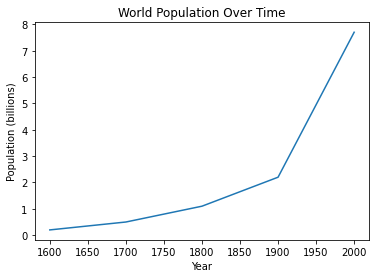

In [31]:
x, y = [1600, 1700, 1800, 1900, 2000], [0.2, 0.5, 1.1, 2.2, 7.7]

plt.plot(x, y)    

plt.title('World Population Over Time')
plt.xlabel('Year')
plt.ylabel('Population (billions)')

plt.show()

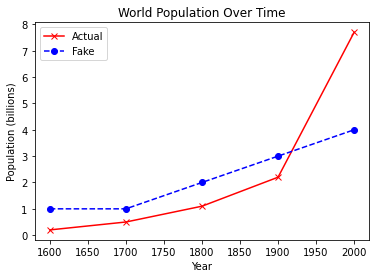

In [32]:
x1, y1 = [1600, 1700, 1800, 1900, 2000], [0.2, 0.5, 1.1, 2.2, 7.7]
x2, y2 = [1600, 1700, 1800, 1900, 2000], [1, 1, 2, 3, 4]

plt.plot(x1, y1, 'rx-', label='Actual') 
plt.plot(x2, y2, 'bo--', label='Fake') 

plt.title('World Population Over Time')
plt.xlabel('Year')
plt.ylabel('Population (billions)')
plt.legend()

plt.show()

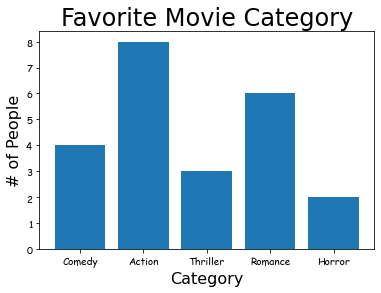

In [33]:
num_people, categories = [4, 8, 3, 6, 2], ["Comedy", "Action", "Thriller", "Romance", "Horror"]

plt.bar(categories, num_people)

plt.title("Favorite Movie Category", fontsize=24)
plt.xlabel("Category", fontsize=16)
plt.ylabel("# of People", fontsize=16)
plt.xticks(fontname="Fantasy")
plt.yticks(fontname="Fantasy")

plt.show()

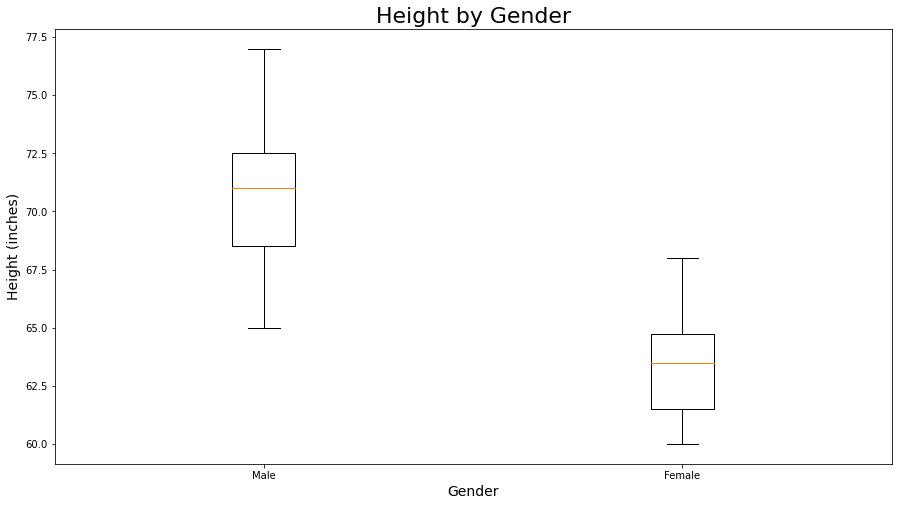

In [34]:
males = [72, 68, 65, 77, 73, 71, 69]
females = [60, 65, 68, 61, 63, 64]
heights = [males, females]

plt.figure(figsize=(15, 8))
plt.boxplot(heights)

plt.xticks([1, 2], ["Male", "Female"])
plt.title("Height by Gender", fontsize=22)
plt.ylabel("Height (inches)", fontsize=14)
plt.xlabel('Gender', fontsize=14)

plt.show()

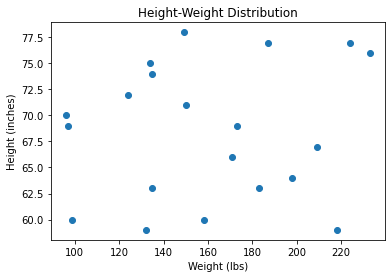

In [35]:
from random import randint
random.seed(2)

height = [ randint(58, 78) for x in range(20) ]   # 20 records between 4'10" and 6'8"
weight = [ randint(90, 250) for x in range(20) ]  # 20 records between 90lbs. and 250lbs.

plt.scatter(weight, height)

plt.title("Height-Weight Distribution")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (inches)")

plt.show()

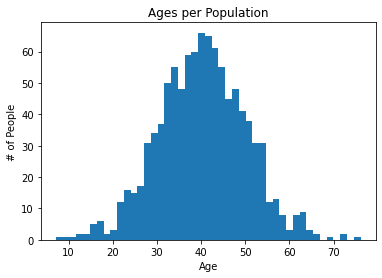

In [36]:
import numpy as np
np.random.seed(5)

ages = [ np.random.normal(loc=40, scale=10) for x in range(1000) ]    # ages centrally distributed around 40

plt.hist(ages, bins=45)

plt.title("Ages per Population")
plt.xlabel("Age")
plt.ylabel("# of People")

plt.savefig('figure10-6.jpg')

plt.show()

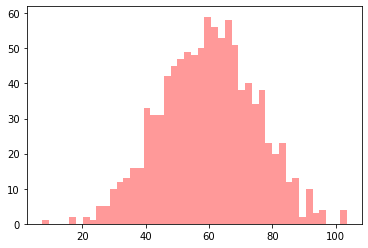

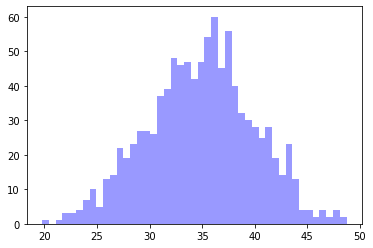

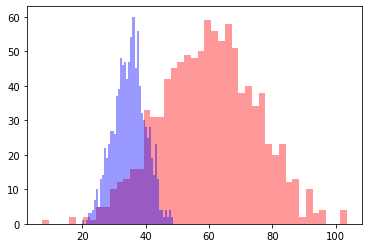

In [37]:
florida = [ np.random.normal(loc=60, scale=15) for x in range(1000) ]
california = [ np.random.normal(loc=35, scale=5) for x in range(1000) ]

plt.hist(florida, bins=45, color='r', alpha=0.4)
plt.show()

plt.hist(california, bins=45, color='b', alpha=0.4)
plt.show()

plt.hist(florida, bins=45, color='r', alpha=0.4)
plt.hist(california, bins=45, color='b', alpha=0.4)
plt.savefig('figure10-7.jpg')
plt.show()

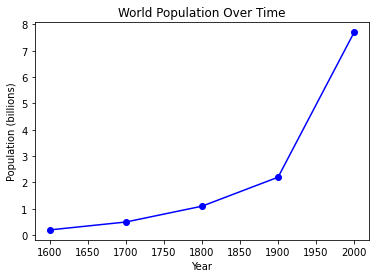

In [38]:
x, y = [1600, 1700, 1800, 1900, 2000], [0.2, 0.5, 1.1, 2.2, 7.7]

plt.plot(x, y, 'bo-')

plt.title('World Population Over Time')
plt.xlabel('Year')
plt.ylabel('Population (billions)')

plt.savefig("population.jpg")

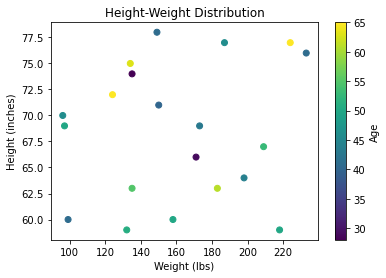

In [39]:
from random import randint
random.seed(2)

height = [ randint(58, 78) for x in range(20) ]
weight = [ randint(90, 250) for x in range(20) ]
age = [ randint(18, 65) for x in range(20) ]

plt.scatter(weight, height, c=age)

plt.title("Height-Weight Distribution")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (inches)")
plt.colorbar(label="Age")    

plt.show()

# Wednesday Exercise

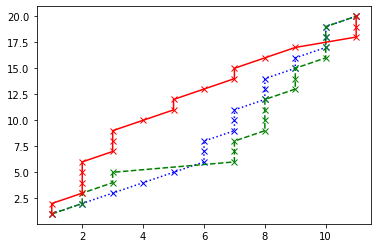

In [50]:
from matplotlib import pyplot as plt
import random

nums1 = sorted([random.randint(1, 11) for x in range(20)])
nums2 = sorted([random.randint(1, 11) for x in range(20)])
nums3 = sorted([random.randint(1, 11) for x in range(20)])

points = [x for x in range(1, 21)]

plt.plot(nums1, points, 'bx:')
plt.plot(nums2, points, 'gx--')
plt.plot(nums3, points, 'rx-')

plt.show()

Name the movie? Equalizer
Is there another user that would like to review (y/n)? y
What would you rate this movie (1-5)? 5
Is there another user that would like to review (y/n)? y
What would you rate this movie (1-5)? 5
Is there another user that would like to review (y/n)? y
What would you rate this movie (1-5)? 5
Is there another user that would like to review (y/n)? y
What would you rate this movie (1-5)? 4
Is there another user that would like to review (y/n)? y
What would you rate this movie (1-5)? 4
Is there another user that would like to review (y/n)? y
What would you rate this movie (1-5)? 3
Is there another user that would like to review (y/n)? y
What would you rate this movie (1-5)? 2
Is there another user that would like to review (y/n)? y
What would you rate this movie (1-5)? 1
Is there another user that would like to review (y/n)? y
What would you rate this movie (1-5)? 1
Is there another user that would like to review (y/n)? y
What would you rate this movie (1-5)? 1
Is t

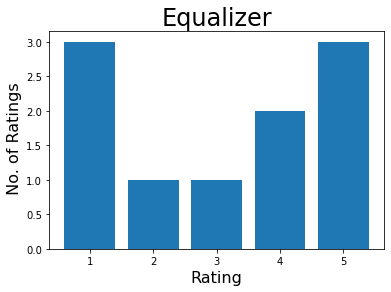

In [51]:
def createGraph(data, movie):
    categories = [k for k in data.keys()]
    ratings_per_category = [v for v in data.values()]
    
    plt.bar(categories, ratings_per_category)

    plt.title("{}".format(movie.title()), fontsize=24)
    plt.xlabel("Rating", fontsize=16)
    plt.ylabel(" No. of Ratings", fontsize=16)
    plt.xticks(fontname="sans-serif")
    plt.yticks(fontname="sans-serif")

    plt.show()

def main():
    data = {}
    
    movie = input('Name the movie? ')
    
    while input('Is there another user that would like to review (y/n)? ') == 'y':
        try:
            ans = int(input('What would you rate this movie (1-5)? '))
            
            if ans in data:
                data[ans] += 1  
            else:
                data[ans] = 1
        except:
            clear_output()
            print("Try again!")
            
    createGraph(data, movie)
    
main()

# Web Scraping

In [52]:
from bs4 import BeautifulSoup
import requests

In [53]:
page = requests.get('http://www.arthurleej.com/e-love.html')

print(page)

<Response [200]>


In [54]:
print(page.content)

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\r<html>\r<head>\r\t<title>Essay on Love by Arthur Lee Jacobson</title>\r<meta name="description" content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson.">\r<meta name="keywords" content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington">\r<meta name="resource-type" content="document">\r<meta name="generator" content="BBEdit 4.5">\r<meta name="robots" content="all">\r<meta name="classification" content="Gardening">\r<meta name="distribution" content="global">\r<meta name="rating" content="general">\r<meta name="copyright" content="2001 Arthur Lee Jacobson">\r<meta name="author" content="eriktyme@eriktyme.com">\r<meta name="language" content="en-us">\r</head>\r<body background="images/background1a.jpg" bgcolor="#FFFFCC" text="#000000" link="#00

In [55]:
soup = BeautifulSoup(page.content, 'html.parser')

print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<html>
 <head>
  <title>
   Essay on Love by Arthur Lee Jacobson
  </title>
  <meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/>
  <meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/>
  <meta content="document" name="resource-type"/>
  <meta content="BBEdit 4.5" name="generator"/>
  <meta content="all" name="robots"/>
  <meta content="Gardening" name="classification"/>
  <meta content="global" name="distribution"/>
  <meta content="general" name="rating"/>
  <meta content="2001 Arthur Lee Jacobson" name="copyright"/>
  <meta content="eriktyme@eriktyme.com" name="author"/>
  <meta content="en-us" name="language"/>
 </head>
 <body alink="#33CC33" background="images/background1a.jpg" b

In [56]:
title = soup.find('b')

print(title)
print(title.get_text())   

<b>Love</b>
Love


In [57]:
poem_text = soup.find_all('b')

for text in poem_text:
    print(text.get_text())

Love
    Of the fourteen essays I'm writing, only this one treats an emotion. That love is the most important emotion is the deduction. I think other emotions may be as important, but are not so powerfully moving or interesting to most of us. Love is exciting. There is no need to justify choosing to write about it. Are not most songs love songs? Are not most novels stories featuring love?
    Love in its broad sense is the feeling of strong attraction, and often attachment and protection. It is felt towards other people, towards pets, towards inanimate objects, towards abstractions such as patriotism, religious matters, hobbies, and I suppose nearly everything. It is multifaceted, and includes ordinary self-love, chivalrous love, carnal or sexual love, friendly love, family love. It is an emotion that is closely related to certain others, such as hope. At its simplest level it is what we strongly like.
    I have a hunch that love, like the rose, owes much of its appeal to our mainstre

In [58]:
page = requests.get('https://github.com/Connor-SM')

soup = BeautifulSoup(page.content, 'html.parser')

username = soup.find('span', attrs={ 'class' : 'vcard-username' })  

print(username)   
print(username.get_text())

<span class="p-nickname vcard-username d-block" itemprop="additionalName">
          Connor-SM

        </span>

          Connor-SM

        


In [59]:
page = requests.get('http://www.arthurleej.com/e-love.html')

soup = BeautifulSoup(page.content, 'html.parser')

print(soup.children)

In [60]:
for child in list(soup.children):
    print(type(child))

<class 'bs4.element.Doctype'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>


In [61]:
html = list(soup.children)[2]

for section in html:
    print("\n\n Start of new section")
    print(section)



 Start of new section
 


 Start of new section
<head> <title>Essay on Love by Arthur Lee Jacobson</title> <meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/> <meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/> <meta content="document" name="resource-type"/> <meta content="BBEdit 4.5" name="generator"/> <meta content="all" name="robots"/> <meta content="Gardening" name="classification"/> <meta content="global" name="distribution"/> <meta content="general" name="rating"/> <meta content="2001 Arthur Lee Jacobson" name="copyright"/> <meta content="eriktyme@eriktyme.com" name="author"/> <meta content="en-us" name="language"/> </head>


 Start of new section
 


 Start of new section
<body alink="#33CC33" background="images/background1a.jpg

In [62]:
head = list(html.children)[1]

for item in head:
    print("\n\n New Tag")
    print(item)



 New Tag
 


 New Tag
<title>Essay on Love by Arthur Lee Jacobson</title>


 New Tag
 


 New Tag
<meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/>


 New Tag
 


 New Tag
<meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/>


 New Tag
 


 New Tag
<meta content="document" name="resource-type"/>


 New Tag
 


 New Tag
<meta content="BBEdit 4.5" name="generator"/>


 New Tag
 


 New Tag
<meta content="all" name="robots"/>


 New Tag
 


 New Tag
<meta content="Gardening" name="classification"/>


 New Tag
 


 New Tag
<meta content="global" name="distribution"/>


 New Tag
 


 New Tag
<meta content="general" name="rating"/>


 New Tag
 


 New Tag
<meta content="2001 Arthur Lee Jacobson" name="copyright"/>


 New Tag
 


 New Tag
<m

In [63]:
title = list(head)[1]

print(title.string)
print(type(title.string))
print(title.get_text())

Essay on Love by Arthur Lee Jacobson
<class 'bs4.element.NavigableString'>
Essay on Love by Arthur Lee Jacobson


# Thursday Exercise

In [64]:
from bs4 import BeautifulSoup
import requests
from bs4.element import Comment

page = requests.get('https://www.york.ac.uk/teaching/cws/wws/webpage1.html')

soup = BeautifulSoup(page.content, 'html.parser')


texts = soup.findAll(text=True)

count = 0

for text in texts:
    words = text.replace('\n', '').replace('\t', '').split(' ')
            
    for word in words:
        if word not in ['', '.', '-']:
            count += 1
            
print(count)

634


In [65]:
from bs4 import BeautifulSoup
import requests

page = requests.get('https://en.wikipedia.org/wiki/List_of_current_National_Football_League_stadiums')

soup = BeautifulSoup(page.content, 'html.parser')

nfl_stadiums_table = soup.findAll('table')[1]

tbody = list(nfl_stadiums_table.children)[1]

stadiums = [] 

for i in range(1, len(list(tbody.children))):
    row = list(tbody.children)[i]
    
    th = row.find('th')
    
    try:
        stadium_name = th.get_text()
        stadiums.append(stadium_name)
    except:
        pass
    
for stadium in stadiums:
    print(stadium)
    
print(len(stadiums))  

Estadio Azteca

Tom Benson Hall of Fame Stadium

Wembley Stadium

Tottenham Hotspur Stadium

4


# Friday Project: Website Analysis

In [66]:
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from bs4.element import Comment
from IPython.display import clear_output

Enter a website to analyze: https://www.microsoft.com/en-us
The top word is: Microsoft


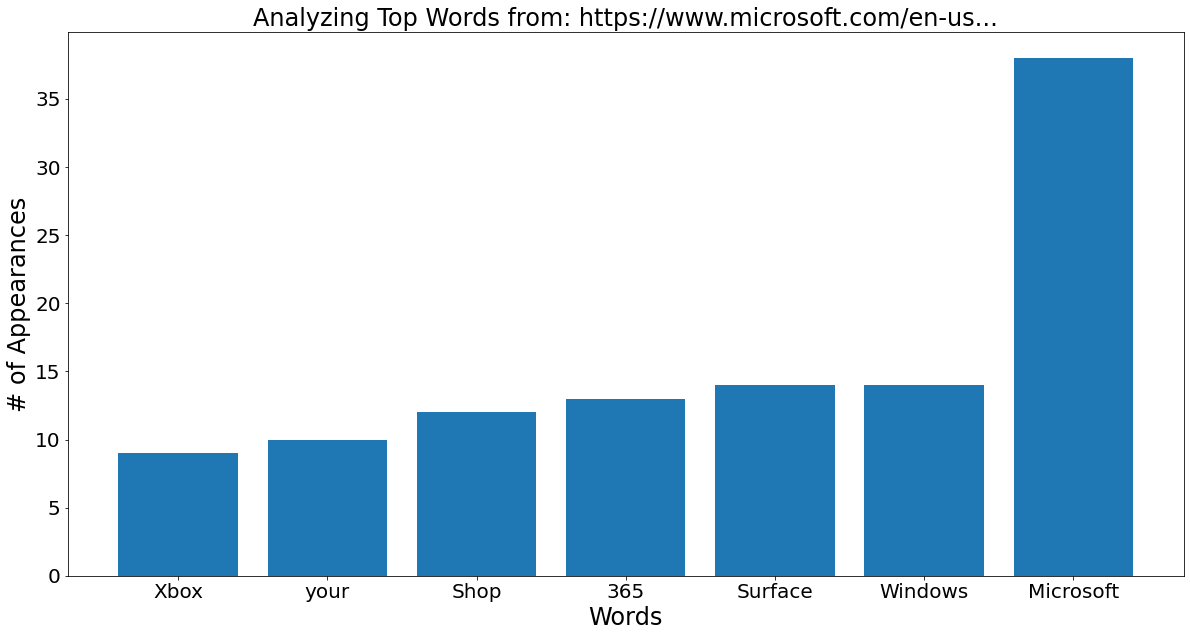

Would you like to scrape a website (y/n)? n
Thanks for analyzing! Come back again!


In [67]:
def displayResults(words, site):
    count = [item[1] for item in words][::-1]   
    word = [item[0] for item in words][::-1]      
    
    plt.figure(figsize=(20, 10))  

    plt.bar(word, count)

    plt.title("Analyzing Top Words from: {}...".format(site[:50]), fontname="Sans Serif", fontsize=24)
    plt.xlabel("Words", fontsize=24)
    plt.ylabel("# of Appearances", fontsize=24)
    plt.xticks(fontname="Sans Serif", fontsize=20)
    plt.yticks(fontname="Sans Serif", fontsize=20)

    plt.savefig('microsoft.png')
    plt.show()
    

def filterWaste(word):
    bad_words = ('the', 'a', 'in', 'of', 'to', 'you', '\xa0', 'and', 'at', 'on', 'for', 'from', 'is', 'that', 'are', 'be', '-', 'as', '&', 'they', 'with',
                 'how', 'was', 'her', 'him', 'i', 'has', '|', 'his')
    
    if word.lower() in bad_words:
        return False
    else:
        return True

def filterTags(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    
    if isinstance(element, Comment):
        return False
    
    return True

def scrape(site):    
    page = requests.get(site)
    
    soup = BeautifulSoup(page.content, 'html.parser')
    
    text = soup.find_all(text=True)     
    
    visible_text = filter(filterTags, text)
    
    word_count = {}

    for text in visible_text:
        words = text.replace('\n', '').replace('\t', '').split(' ')   

        words = list(filter(filterWaste, words))
        
        for word in words:
            if word != '':
                if word in word_count:
                    word_count[word] += 1
                else:
                    word_count[word] = 1
                     
    word_count = sorted(word_count.items(), key=lambda kv: kv[1], reverse=True)        
    
    return word_count[:7]
            
while input('Would you like to scrape a website (y/n)? ') == 'y':
    try:
        clear_output()
    
        site = input('Enter a website to analyze: ')
    
        top_words = scrape(site)
        
        top_word = top_words[0]   
        
        print("The top word is: {}".format(top_word[0]))
        
        displayResults(top_words, site)
    except:
        print('Something went wrong, please try again.')
    
print('Thanks for analyzing! Come back again!')

# End of Week Exercise

Enter a website to analyze: http://www.facebook.com

This is a list of words currently being filtered:
{'her', '\xa0', 'with', '-', 'are', 'to', 'a', 'the', 'for', 'how', 'they', 'on', 'of', 'his', 'at', 'from', 'him', '|', 'and', 'that', 'be', 'i', 'in', 'as', 'you', 'has', 'was', 'is', '&'}

Would you like to filter any others? no
The top word is: बनाएँ


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2311 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2360 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2375 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2306 missing from current

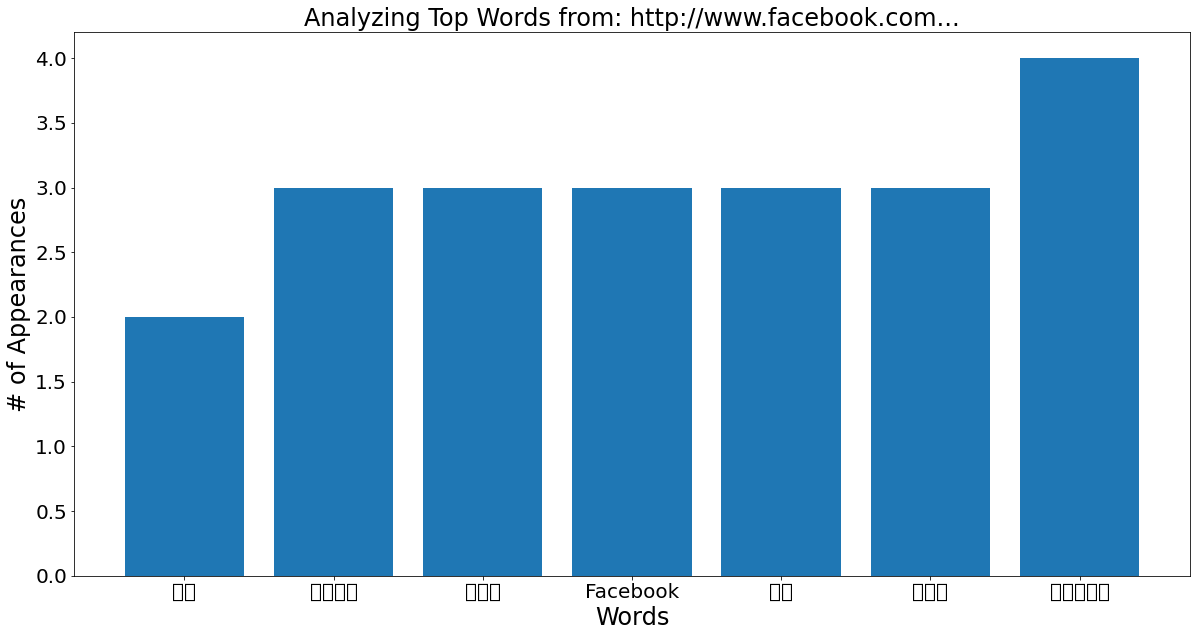

In [ ]:
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from bs4.element import Comment
from IPython.display import clear_output


def displayResults(words, site):
    count = [item[1] for item in words][::-1]   
    word = [item[0] for item in words][::-1]     
    
    plt.figure(figsize=(20, 10))   

    plt.bar(word, count)

    plt.title("Analyzing Top Words from: {}...".format(site[:50]), fontname="Sans Serif", fontsize=24)
    plt.xlabel("Words", fontsize=24)
    plt.ylabel("# of Appearances", fontsize=24)
    plt.xticks(fontname="Sans Serif", fontsize=20)
    plt.yticks(fontname="Sans Serif", fontsize=20)

    plt.savefig('microsoft.png')
    plt.show()    
    
def filterTags(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    
    if isinstance(element, Comment):
        return False
    
    return True


def scrape(site):    
    page = requests.get(site)
    
    soup = BeautifulSoup(page.content, 'html.parser')
    
    text = soup.find_all(text=True)     
    
    visible_text = filter(filterTags, text)
    
    word_count = {}
    
    bad_words = set(['the', 'a', 'in', 'of', 'to', 'you', '\xa0', 'and', 'at', 'on', 'for', 'from', 'is', 'that', 'are', 'be', '-', 'as', '&', 'they', 'with',
                 'how', 'was', 'her', 'him', 'i', 'has', '|', 'his'])
    
    print('\nThis is a list of words currently being filtered:')
    print(bad_words)
    
    while input('\nWould you like to filter any others? ').lower() != 'no':
        print('\nThis is a list of words currently being filtered:')
        print(bad_words)
        
        word = input('What word would you like to filter? ')

        bad_words.add(word)

        clear_output()

    for text in visible_text:
        words = text.replace('\n', '').replace('\t', '').split(' ')   
    
        words = list(filter(lambda word: True if word.lower() not in bad_words else False, words))
        
        for word in words:
            if word != '':
                if word in word_count:
                    word_count[word] += 1
                else:
                    word_count[word] = 1
                     
    word_count = sorted(word_count.items(), key=lambda kv: kv[1], reverse=True)        
    
    return word_count[:7]
            

while input('Would you like to scrape a website (y/n)? ') == 'y':
    try:
        clear_output()
    
        site = input('Enter a website to analyze: ')
    
        top_words = scrape(site)
        
        top_word = top_words[0]   
        
       
        print("The top word is: {}".format(top_word[0]))
        
        displayResults(top_words, site)
    except:
        print('Something went wrong, please try again.')
    
print('Thanks for analyzing! Come back again!')

In [ ]:
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from bs4.element import Comment
from IPython.display import clear_output


def displayResults(words, site):
    count = [item[1] for item in words][::-1]     
    word = [item[0] for item in words][::-1]     
    
    plt.figure(figsize=(20, 10))   

    plt.bar(word, count)

    plt.title("Analyzing Top Words from: {}...".format(site[:50]), fontname="Sans Serif", fontsize=24)
    plt.xlabel("Words", fontsize=24)
    plt.ylabel("# of Appearances", fontsize=24)
    plt.xticks(fontname="Sans Serif", fontsize=20)
    plt.yticks(fontname="Sans Serif", fontsize=20)
    
    ans = input('Would you like to save this image (y/n)? ').lower()
    
    if ans == 'y':
        print('Please provide the name and extension, ex: "image.png"...')
        
        filename = input('What would you like to call the chart? ')
        
        plt.savefig(filename)
        
        print('File saved!')
        
    plt.show()
    

def filterTags(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    
    if isinstance(element, Comment):
        return False
    
    return True


def scrape(site):    
    page = requests.get(site)
    
    soup = BeautifulSoup(page.content, 'html.parser')
    
    text = soup.find_all(text=True)   
    
    visible_text = filter(filterTags, text)
    
    word_count = {}
    
    bad_words = set(['the', 'a', 'in', 'of', 'to', 'you', '\xa0', 'and', 'at', 'on', 'for', 'from', 'is', 'that', 'are', 'be', '-', 'as', '&', 'they', 'with',
                 'how', 'was', 'her', 'him', 'i', 'has', '|', 'his'])
    
    print('\nThis is a list of words currently being filtered:')
    print(bad_words)
    
    while input('\nWould you like to filter any others? ').lower() != 'no':
        print('\nThis is a list of words currently being filtered:')
        print(bad_words)
        
        word = input('What word would you like to filter? ')

        bad_words.add(word)

        clear_output()

    for text in visible_text:
        words = text.replace('\n', '').replace('\t', '').split(' ')   # replace all hidden chars
    
        words = list(filter(lambda word: True if word.lower() not in bad_words else False, words))
        
        for word in words:
            if word != '':
                if word in word_count:
                    word_count[word] += 1
                else:
                    word_count[word] = 1
                     
    word_count = sorted(word_count.items(), key=lambda kv: kv[1], reverse=True)        
    
    return word_count[:7]
            

while input('Would you like to scrape a website (y/n)? ') == 'y':
    try:
        clear_output()
    
        site = input('Enter a website to analyze: ')
    
        top_words = scrape(site)
        
        top_word = top_words[0]   
        
       
        print("The top word is: {}".format(top_word[0]))
        
        displayResults(top_words, site)
    except:
        print('Something went wrong, please try again.')
    
print('Thanks for analyzing! Come back again!')


Would you like to filter any others? no
   Frequency       Word
0         21  Microsoft
1          9       Xbox
2          9    Windows
3          9    Surface
4          8     Office
5          7        NOW
6          7        365
The top word is: Microsoft
Would you like to save this image (y/n)? n


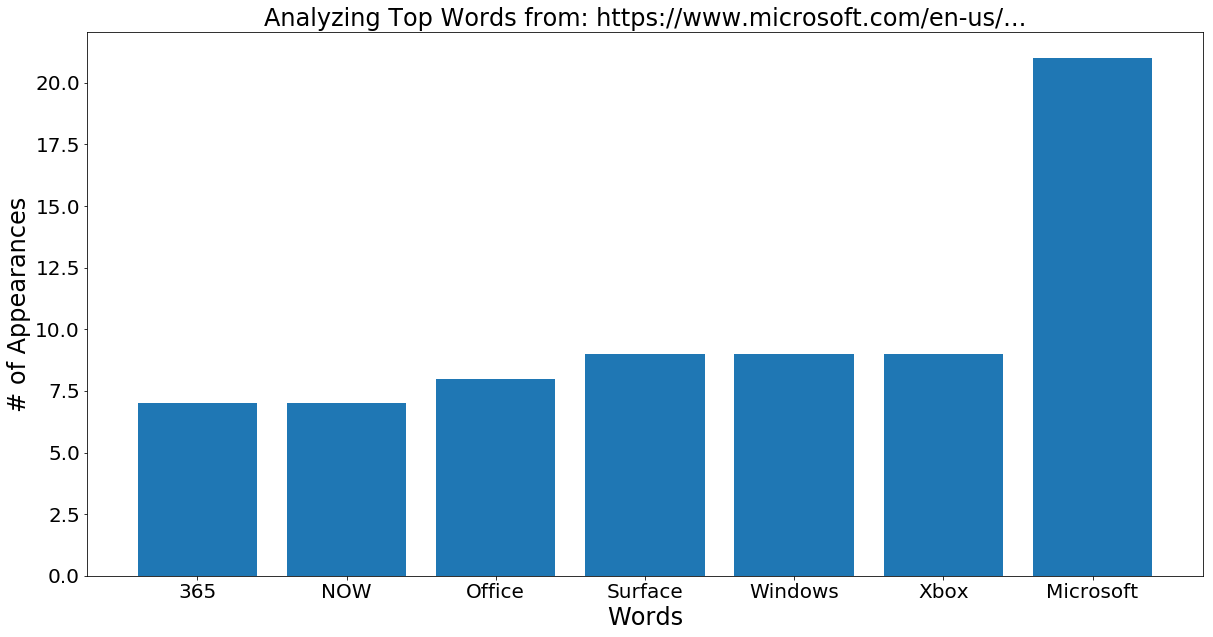

Would you like to scrape a website (y/n)? n
Thanks for analyzing! Come back again!


In [2]:
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from bs4.element import Comment
import pandas as pd
from IPython.display import clear_output


def displayResults(words, site):
    count = [num for num in words['Frequency']][::-1]   
    word = [word for word in words['Word']][::-1]      
    
    plt.figure(figsize=(20, 10))  

    plt.bar(word, count)

    plt.title("Analyzing Top Words from: {}...".format(site[:50]), fontname="Sans Serif", fontsize=24)
    plt.xlabel("Words", fontsize=24)
    plt.ylabel("# of Appearances", fontsize=24)
    plt.xticks(fontname="Sans Serif", fontsize=20)
    plt.yticks(fontname="Sans Serif", fontsize=20)
    
    ans = input('Would you like to save this image (y/n)? ').lower()
    
    if ans == 'y':
        print('Please provide the name and extension, ex: "image.png"...')
        
        filename = input('What would you like to call the chart? ')
        
        plt.savefig(filename)
        
        print('File saved!')
        
    plt.show()
    

def filterTags(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    
    if isinstance(element, Comment):
        return False
    
    return True


def scrape(site):    
    page = requests.get(site)
    
    soup = BeautifulSoup(page.content, 'html.parser')
    
    text = soup.find_all(text=True)    
    
    visible_text = filter(filterTags, text)
    
    word_count = {}
    
    bad_words = set(['the', 'a', 'in', 'of', 'to', 'you', '\xa0', 'and', 'at', 'on', 'for', 'from', 'is', 'that', 'are', 'be', '-', 'as', '&', 'they', 'with',
                 'how', 'was', 'her', 'him', 'i', 'has', '|', 'his'])
    
    print('\nThis is a list of words currently being filtered:')
    print(bad_words)
    
    while input('\nWould you like to filter any others? ').lower() != 'no':
        print('\nThis is a list of words currently being filtered:')
        print(bad_words)
        
        word = input('What word would you like to filter? ')

        bad_words.add(word)

        clear_output()

    for text in visible_text:
        words = text.replace('\n', '').replace('\t', '').split(' ')  
    
        words = list(filter(lambda word: True if word.lower() not in bad_words else False, words))
        
        for word in words:
            if word != '':
                if word in word_count:
                    word_count[word] += 1
                else:
                    word_count[word] = 1
                    
    words = [word for word in word_count.keys()]
    frequency = [word for word in word_count.values()]
                             
    df = pd.DataFrame.from_dict({ 'Word' : words, 'Frequency' : frequency })
    
    df = df.sort_values('Frequency', ascending=False).reset_index(drop=True)
    
    return df
            

while input('Would you like to scrape a website (y/n)? ') == 'y':
    try:
        clear_output()

        site = input('Enter a website to analyze: ')

        df = scrape(site)

        print(df.head(7))

        top_word = df.loc[0]['Word']
        top_words = df[0:7]

        print("The top word is: {}".format(top_word))

        displayResults(top_words, site)
    except:
        print('Something went wrong, please try again.')
    
print('Thanks for analyzing! Come back again!')

In [ ]:
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from bs4.element import Comment
import pandas as pd
from IPython.display import clear_output

def saveCSVData(df, site):        
    site_name = site.split('.')[1]

    name = 'site_data/{}_frequent_words.csv'.format(site_name)
    
    df.to_csv(name)


def displayResults(words, site):
    count = [num for num in words['Frequency']][::-1]    
    word = [word for word in words['Word']][::-1]     
    
    plt.figure(figsize=(20, 10))   

    plt.bar(word, count)

    plt.title("Analyzing Top Words from: {}...".format(site[:50]), fontname="Sans Serif", fontsize=24)
    plt.xlabel("Words", fontsize=24)
    plt.ylabel("# of Appearances", fontsize=24)
    plt.xticks(fontname="Sans Serif", fontsize=20)
    plt.yticks(fontname="Sans Serif", fontsize=20)
    
    ans = input('Would you like to save this image (y/n)? ').lower()
    
    if ans == 'y':
        print('Please provide the name and extension, ex: "image.png"...')
        
        filename = input('What would you like to call the chart? ')
        
        plt.savefig(filename)
        
        print('File saved!')
        
    plt.show()
    
def filterTags(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    
    if isinstance(element, Comment):
        return False
    
    return True

def scrape(site):    
    page = requests.get(site)
    
    soup = BeautifulSoup(page.content, 'html.parser')
    
    text = soup.find_all(text=True)     
    
    visible_text = filter(filterTags, text)
    
    word_count = {}
    
    bad_words = set(['the', 'a', 'in', 'of', 'to', 'you', '\xa0', 'and', 'at', 'on', 'for', 'from', 'is', 'that', 'are', 'be', '-', 'as', '&', 'they', 'with',
                 'how', 'was', 'her', 'him', 'i', 'has', '|', 'his'])
    
    print('\nThis is a list of words currently being filtered:')
    print(bad_words)
    
    while input('\nWould you like to filter any others? ').lower() != 'no':
        print('\nThis is a list of words currently being filtered:')
        print(bad_words)
        
        word = input('What word would you like to filter? ')

        bad_words.add(word)

        clear_output()

    for text in visible_text:
        words = text.replace('\n', '').replace('\t', '').split(' ')   
    
        words = list(filter(lambda word: True if word.lower() not in bad_words else False, words))
        
        for word in words:
            if word != '':
                if word in word_count:
                    word_count[word] += 1
                else:
                    word_count[word] = 1
                     
    words = [word for word in word_count.keys()]
    frequency = [word for word in word_count.values()]
                             
    df = pd.DataFrame.from_dict({ 'Word' : words, 'Frequency' : frequency })
    
    df = df.sort_values('Frequency', ascending=False).reset_index(drop=True)
    
    return df
            

while input('Would you like to scrape a website (y/n)? ') == 'y':
    try:
        clear_output()

        site = input('Enter a website to analyze: ')

        df = scrape(site)

        print(df.head(7))

        top_word = df.loc[0]['Word']
        top_words = df[0:7]

        print("The top word is: {}".format(top_word))

        displayResults(top_words, site)
        
        saveCSVData(df, site)
    except:
        print('Something went wrong, please try again.')
    
print('Thanks for analyzing! Come back again!')